In [1]:
import numpy as np
import matplotlib.pyplot as plt
#from matplotlib.ticker import MultipleLocator, FormatStrFormatter
import matplotlib as mpl

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [3]:
mpl.rcParams['xtick.labelsize'] = 50
mpl.rcParams['ytick.labelsize'] = 50
mpl.rcParams['font.size'] = 50
mpl.rcParams['figure.figsize'] =  15,10
mpl.rcParams['axes.labelsize'] = 50
mpl.rcParams['mathtext.fontset'] = 'stix'
mpl.rcParams['font.family'] = 'STIXGeneral'
mpl.rcParams['axes.linewidth'] = 2.5

In [4]:
import numpy as np

In [5]:
data = []

In [6]:
with open('Data-GT/leaf/all_results_w_labels') as fs:
    for line in fs:
        temp = line.strip().split('\t')
        data.append(temp[2:])

In [10]:
data = np.array(data,dtype=np.float)

In [15]:
#data = np.loadtxt('Data-GT/Whitewine/results_to_plot',delimiter='	')
data = np.loadtxt('Data-GT/MNIST/all_results_use',delimiter='  ')

In [11]:
data.shape

(12, 7)

In [21]:
data[:,5]

array([-0.195   ,  0.139   ,  0.121   ,  0.115   , -0.25    , -0.26    ,
        0.137   ,  0.124   ,  0.139   , -0.337   , -0.009375, -0.012   ])

In [15]:
labels = []
with open('Data-GT/leaf/all_labels') as fs:
    for line in fs:
        labels.append(line.strip())

In [9]:
labels

['l1AP',
 'l1AV',
 'l1CO',
 'l1KM',
 'l1SI',
 'l2AP',
 'l2AV',
 'l2CO',
 'l2KM',
 'l2SI',
 'SP',
 'BI']

In [25]:
data[:,6]

array([1.27 , 1.42 , 1.832, 1.9  , 1.103, 0.949, 1.364, 1.688, 1.78 ,
       0.966, 6.83 , 2.65 ])

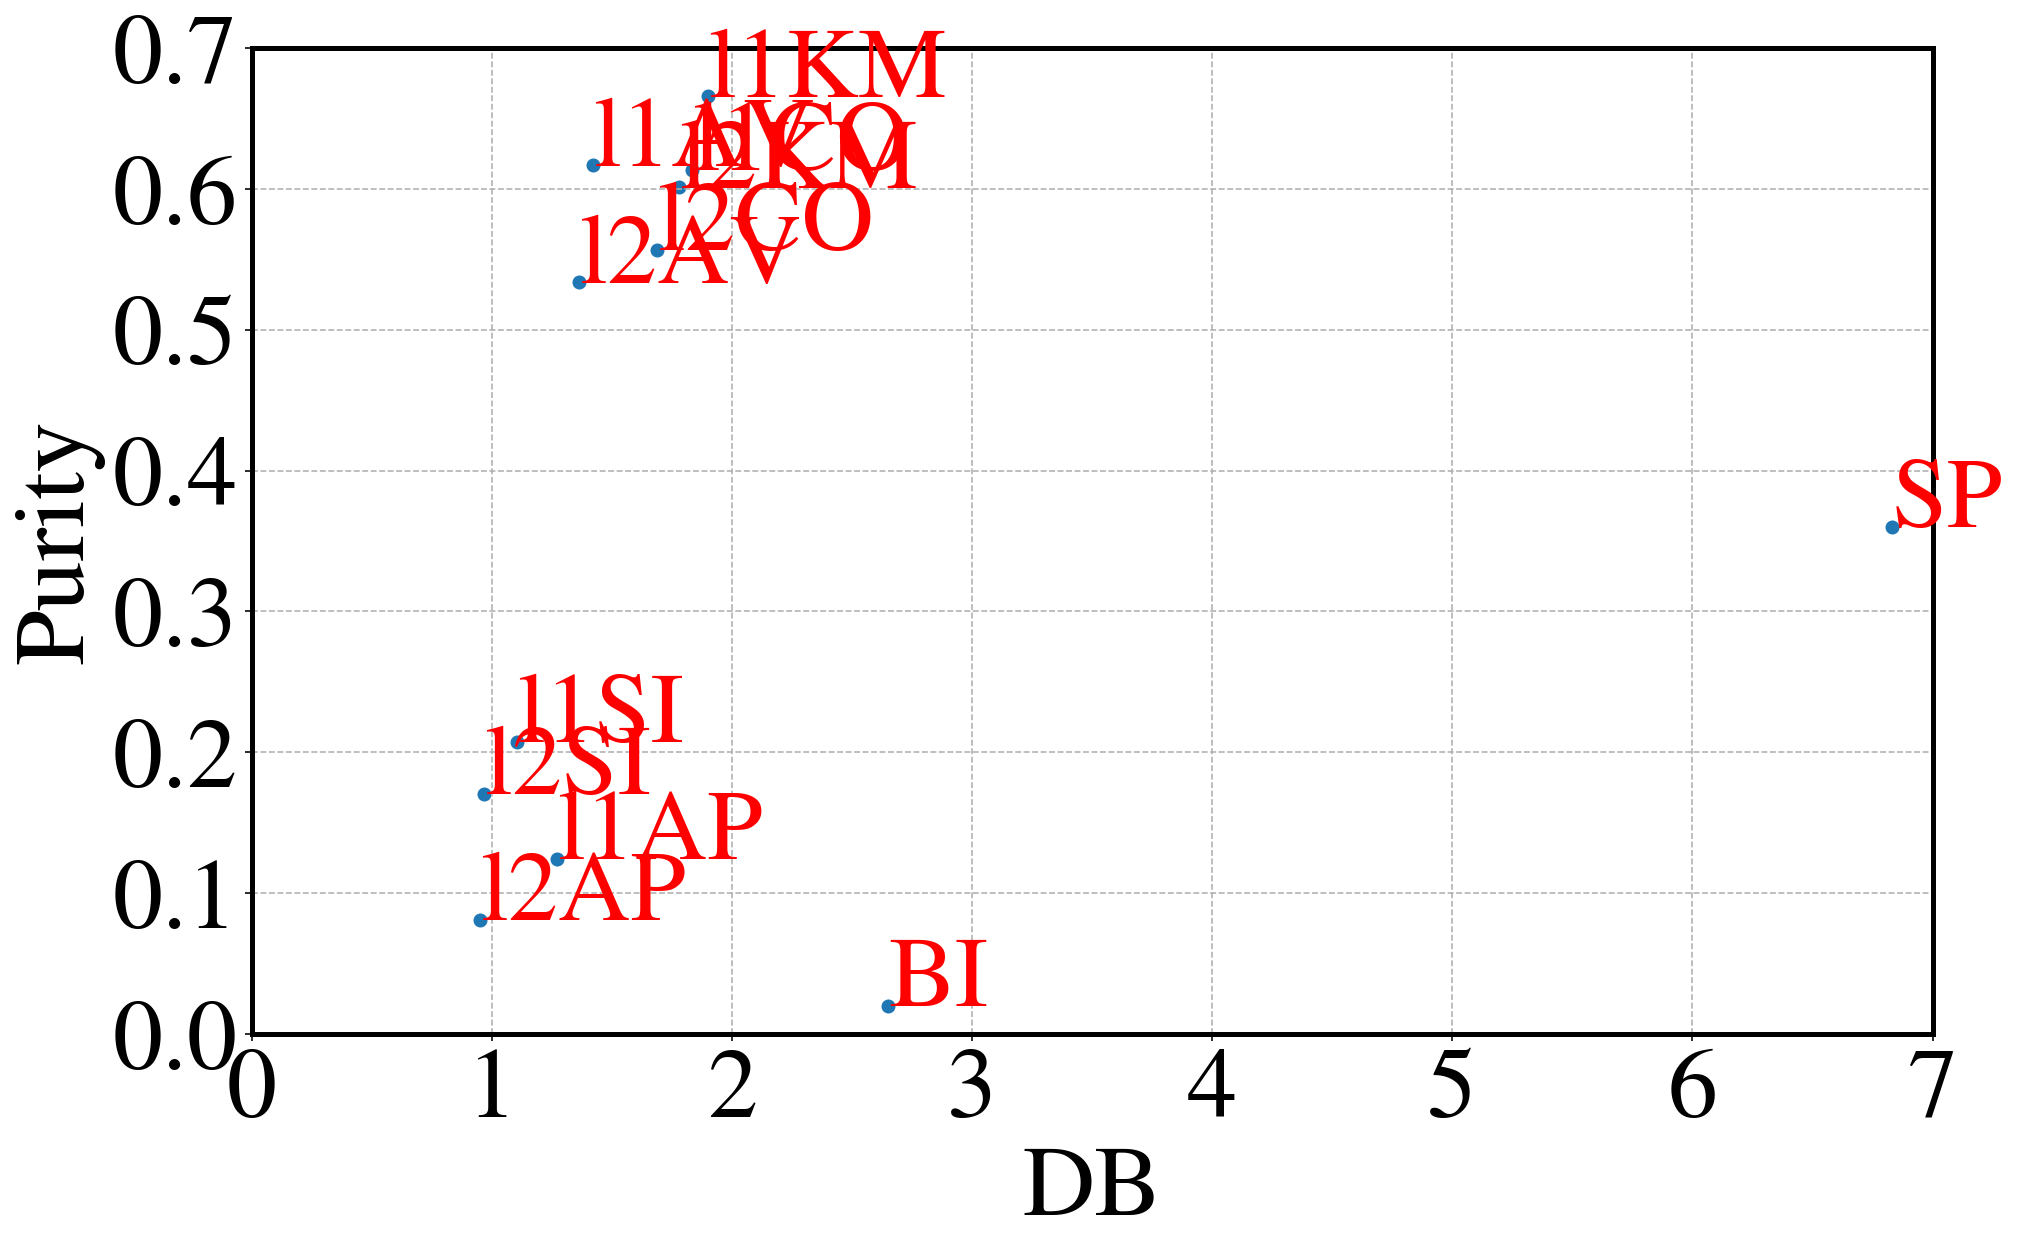

In [27]:
fig, ax = plt.subplots()
plt.grid(linestyle='--')

plt.ylim(0,0.7)
y_pos = np.arange(0,0.8,step = 0.1)
ax.set_yticks(y_pos)
plt.xlim(0,7)
x_pos = np.arange(0,8,step = 1)
ax.set_xticks(x_pos)
plt.ylabel('Purity')
plt.xlabel('DB')

ax.scatter(data[:,6],data[:,2])

for i, txt in enumerate(labels):
    ax.annotate(txt, (data[i,6], data[i,2]), color='r', fontsize=50)

plt.tight_layout()
plt.savefig('plots/leaf_DB_purity.pdf',dpi=200)    

In [189]:
from matplotlib.lines import Line2D

In [196]:
custom_lines = [Line2D([0], [0], color='r', lw=2),
                Line2D([0], [0], color='b', lw=2)]

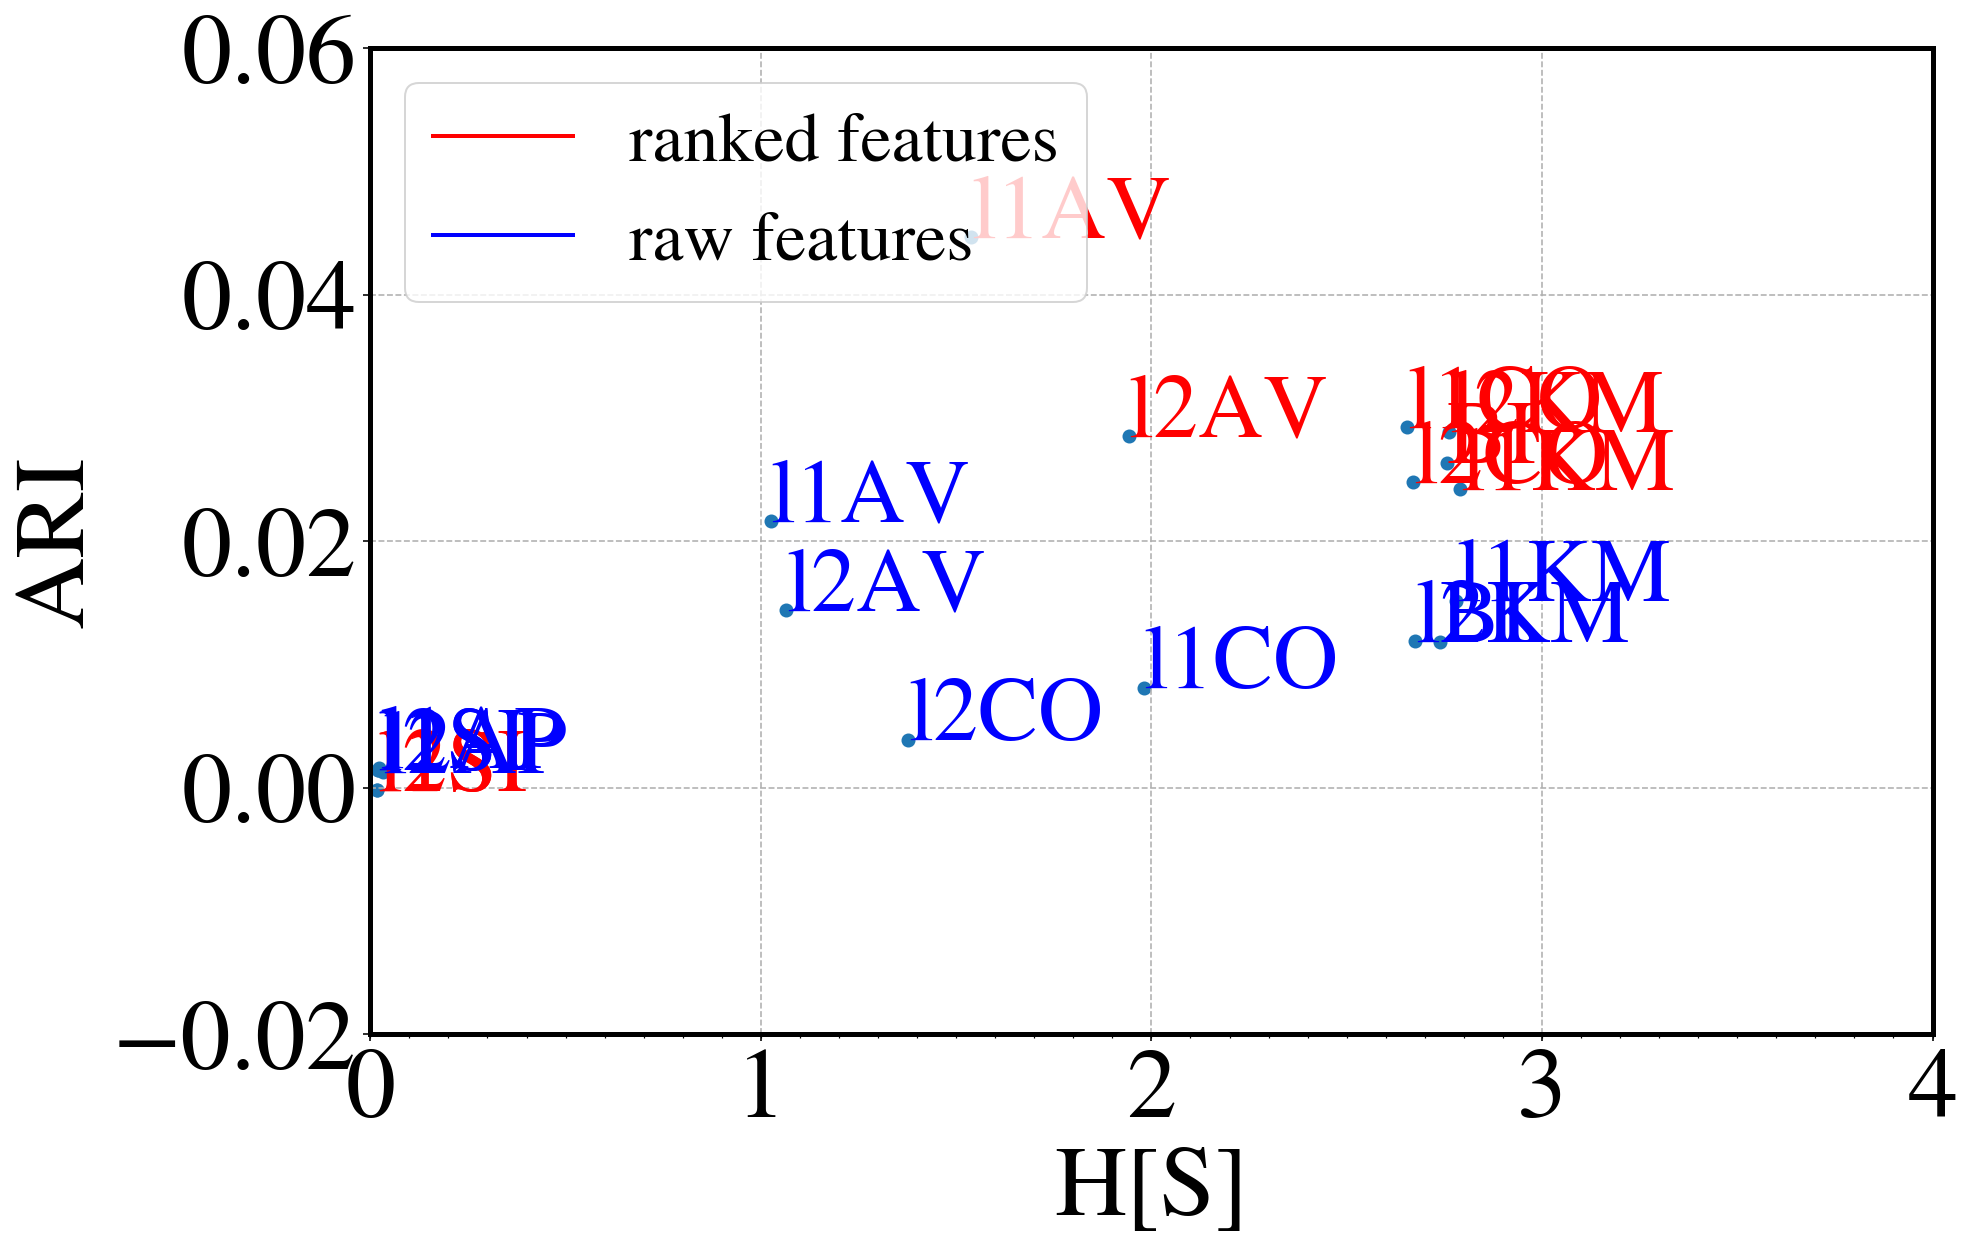

In [242]:
fig, ax = plt.subplots()
majorLocator = MultipleLocator(1)
majorFormatter = FormatStrFormatter('%d')
minorLocator = MultipleLocator(0.1)

ax.xaxis.set_major_locator(majorLocator)
ax.xaxis.set_major_formatter(majorFormatter)
ax.xaxis.set_minor_locator(minorLocator)
plt.grid(linestyle='--')

plt.ylim(-0.02,0.06)
y_pos = np.arange(-0.02,0.08,step = 0.02)
ax.set_yticks(y_pos)
plt.xlim(0,4)
x_pos = np.arange(0,5,step = 1)
ax.set_xticks(x_pos)
plt.ylabel('ARI')
plt.xlabel('H[S]')
ax.legend(custom_lines, ['ranked features', 'raw features'],loc = 'upper left',fontsize=35)
ax.scatter(data[:,0],data[:,4])

for i, txt in enumerate(labels):
    if 'rw' in txt:
        ax.annotate(txt.replace('rw',''), (data[i,0], data[i,4]), color='b', fontsize=45)
    else:
        ax.annotate(txt.replace('ra',''), (data[i,0], data[i,4]), color='r', fontsize=45)

plt.tight_layout()
plt.savefig('plots/whitewine_ARI.pdf',dpi=200)    

In [22]:
H_sig = [0.34, 0.52, 0.47, 0.16, 0.15, 0.62, 0.28, 0.45, 0.47, 0.42, 0.56, 0.30, 0.33, 0.41, 0.18]
H_s = [0.65, 0.62, 0.89, 0.56, 0.53, 0.76, 0.52, 0.70, 0.82, 0.79, 0.91, 0.75, 0.85, 0.78, 0.82]

In [23]:
len(H_sig)

15

In [24]:
len(H_s)

15

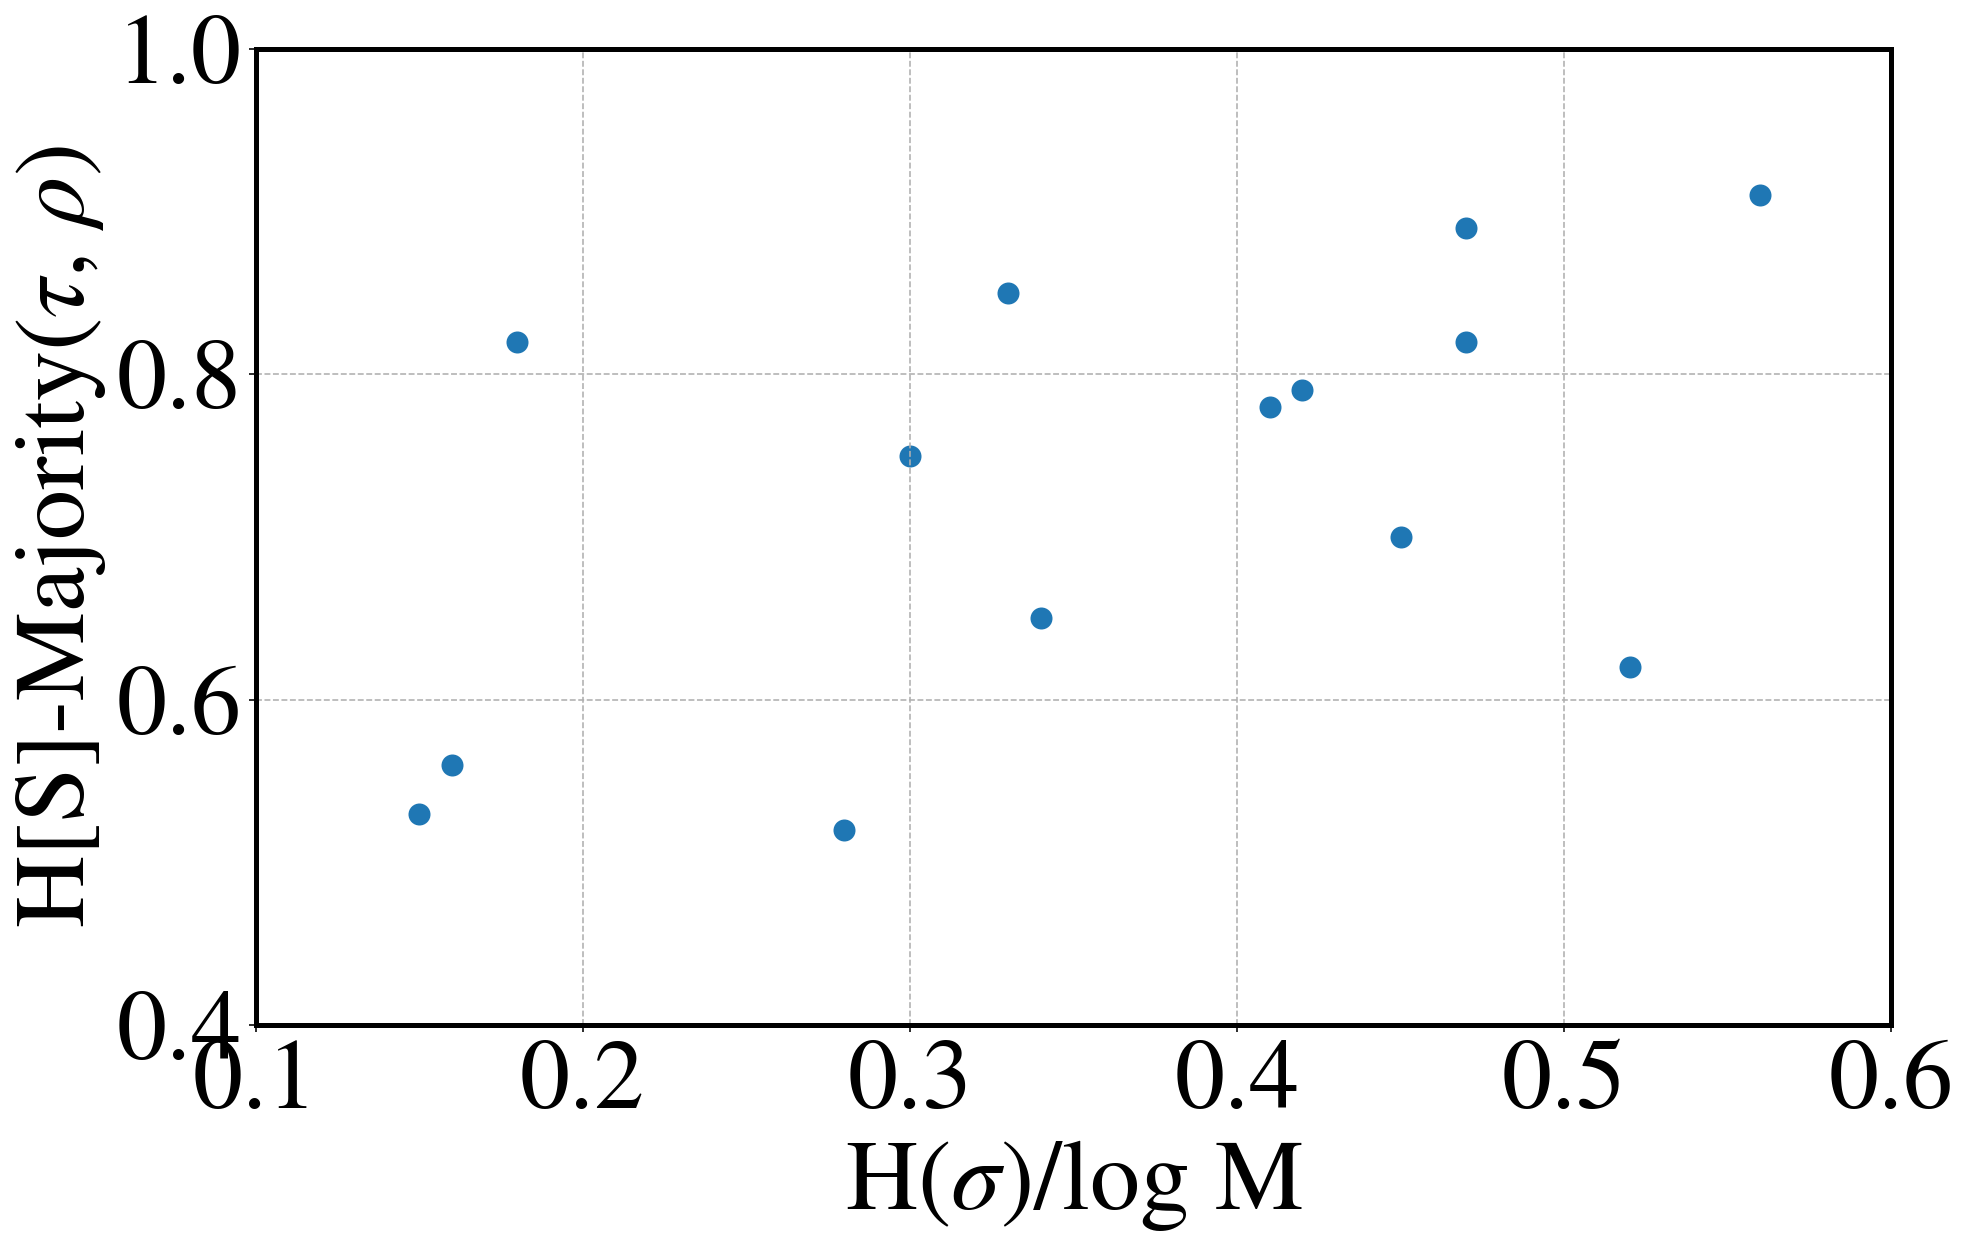

In [36]:
fig, ax = plt.subplots()
majorLocator = MultipleLocator(1)
majorFormatter = FormatStrFormatter('%d')
minorLocator = MultipleLocator(0.1)

#ax.xaxis.set_major_locator(majorLocator)
#ax.xaxis.set_major_formatter(majorFormatter)
#ax.xaxis.set_minor_locator(minorLocator)
plt.grid(linestyle='--')

plt.xlim(0.1,0.6)
x_pos = np.arange(0.1,0.7,step = 0.1)
#print(x_pos)
ax.set_xticks(x_pos)

plt.ylim(0.4,1.0)
y_pos = np.arange(0.4,1.2,step = 0.2)
ax.set_yticks(y_pos)

plt.xlabel(r'H($\sigma$)/log M')
plt.ylabel(r'H[S]-Majority($\tau$, $\rho$)')

ax.scatter(H_sig,H_s,s=100)

plt.tight_layout()
plt.savefig('plots/summary.pdf',dpi=200)